In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
sample=pd.read_csv("sample_submission.csv")

train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
#No null values for both training and testing data
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
categorical_features=['Gender','Vehicle_Age','Vehicle_Damage']
Nominal_feature=['Gender','Vehicle_Damage']
ordinal_feature=['Vehicle_Age']

In [5]:
#Functions to take care of the encoding part of Nominal and orninal features
def enc_b(df,columns,first_value):
    df=df.copy()
    df[columns]=df[columns].apply(lambda x: 1 if x==first_value else 0)
    return df

def enc_n(df,columns,value):
    df=df.copy()
    df[columns]=df[columns].apply(lambda x: value.index(x))  
    return df

In [6]:
#Applying the encoding function and conerting it to numeric values

vehicle_age=['< 1 Year','1-2 Year','> 2 Years']

train_df=enc_b(train_df,"Gender","Male")
test_df=enc_b(test_df,"Gender","Male")

train_df=enc_b(train_df,"Vehicle_Damage","Yes")
test_df=enc_b(test_df,"Vehicle_Damage","Yes")

train_df=enc_n(train_df,"Vehicle_Age",vehicle_age)
test_df=enc_n(test_df,"Vehicle_Age",vehicle_age)

In [7]:
#All the categorical alues are successfully taken care of
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,0,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,0,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,2,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,2,0,27496.0,152.0,39,0


In [8]:
#removing the id column from train and test dataset

test_ids=test_df['id'].tolist()

train_df=train_df.drop("id",axis=1)
test_df=test_df.drop("id",axis=1)
test_df_original=test_df

In [261]:
X=train_df.drop("Response",axis=1)
y=train_df["Response"]

In [262]:
#checking the skewness of y that is the Response column from the test dataset
y.sum()/len(y)

#Positive response is very less compared to the negative response (data is skewed) in the training dataset

0.12256336113815208

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


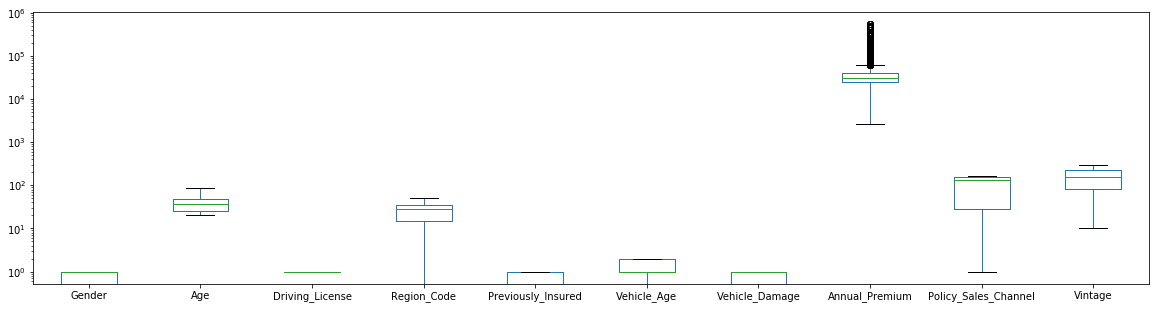

In [263]:
X.plot(kind='box',figsize=(20,5),logy=True)

From the plot it is observed that there are outliers in the column "Annual_Premium". 
and now we will be using MinMax Scaler on the dataset

In [264]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [265]:
X_train=scaler.fit_transform(X_train) #X is converted into a numpy array
X_test=scaler.fit_transform(X_test) 
test_df=scaler.fit_transform(test_df)

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [267]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [268]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [269]:
predictions=reg.predict(X_test)

In [270]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.88      1.00      0.94    100386\n          1       0.00      0.00      0.00     13947\n\navg / total       0.77      0.88      0.82    114333\n'

In [271]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8780142216158064

The test dataset is without the "Response coulumn" and thus we will predict the values using the above model

In [273]:
test_predict=reg.predict(test_df)
respone_test=pd.DataFrame(test_predict)

#test_df_original is the dataframe before scalingthe test dataset
predicted_df=pd.concat([test_df_original,respone_test],axis=1)
predicted_df.columns.values[10]="Predicted_Response"

In [274]:
predicted_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Predicted_Response
0,1,25,1,11.0,1,2,0,35786.0,152.0,53,0
1,1,40,1,28.0,0,1,1,33762.0,7.0,111,0
2,1,47,1,28.0,0,1,1,40050.0,124.0,199,0
3,1,24,1,27.0,1,2,1,37356.0,152.0,187,0
4,1,27,1,28.0,1,2,0,59097.0,152.0,297,0


In [276]:
predicted_df["Predicted_Response"].sum()
#We have predicted 2925 postive responses from the given test dataset

2925